In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure as fg
from collections import Counter

df = pd.read_csv('H:\Python\Fundamental.csv')
des_df = pd.read_csv('H:\Python\Fundamental_Des.csv', header=None)

df.columns =  [x.strip() for x in df.columns]
des_df.columns = ['Ratio','Formula','Group']
des_df['Ratio'] = [x.strip() for x in des_df['Ratio']]

In [2]:
df['Size'] =  [x.strip() for x in df['Size']]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3048 entries, 0 to 3047
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Code                           3048 non-null   object 
 1   Name                           3048 non-null   object 
 2   Market Cap                     3048 non-null   object 
 3   Size                           3048 non-null   object 
 4   Sector                         3048 non-null   object 
 5   Industry                       3048 non-null   object 
 6   Current Ratio                  2376 non-null   float64
 7   Quick Ratio                    2376 non-null   float64
 8   Cash Ratio                     2376 non-null   float64
 9   Operating Cash Flow Ratio      2375 non-null   float64
 10  Debt Ratio                     3043 non-null   float64
 11  Debt to Equity Ratio           2908 non-null   float64
 12  Interest Coverage Ratio        1977 non-null   f

In [4]:
des_df

,Ratio,Formula,Group
0,Current Ratio,Current Ratio = Current assets / Current liabi...,Liquidity ratios - ability to repay obligations
1,Quick Ratio,Quick Ratio = (Current assets - inventories) /...,Liquidity ratios - ability to repay obligations
2,Cash Ratio,Cash Ratio = Cash and equivalents / Current li...,Liquidity ratios - ability to repay obligations
3,Operating Cash Flow Ratio,Operating cash flow Ratio = Operating cash flo...,Liquidity ratios - ability to repay obligations
4,Debt Ratio,Debt ratio = Total liabilities / Total Asset,Leverage Ratios = Capital that comes from debt
5,Debt to Equity Ratio,Debt to equity ratio = Total Liabilities / Sha...,Leverage Ratios = Capital that comes from debt
6,Interest Coverage Ratio,Interest coverage ratio = Operating income / I...,Leverage Ratios = Capital that comes from debt
7,Debt Coverage Ratio,Debt service coverage ratio = Operating income...,Leverage Ratios = Capital that comes from debt
8,Asset Turnover Ratio,Asset turnover ratio = Net sales / Average tot...,Efficiency Ratios = how well a company is util...
9,Inventory Turnover Ratio,Inventory Turnover ratio = COGS / Average inve...,Efficiency Ratios = how well a company is util...


In [5]:
liquidity_ratio = ['Current Ratio', 'Quick Ratio', 'Cash Ratio', 'Operating Cash Flow Ratio']
leverage_ratio = ['Debt Ratio', 'Debt to Equity Ratio', 'Interest Coverage Ratio', 'Debt Coverage Ratio']
efficiency_ratio =['Asset Turnover Ratio', 'Inventory Turnover Ratio', 'Receivable Turnover Ratio', 'Days Sales in Inventory Ratio']
profitability_ratio = ['Gross margin ratio', 'Operating Margin Ratio', 'Return on Assets Ratio', 'Return on Equity Ratio']
market_value_ratio = ['Book Value Per Share Ratio', 'Dividend Yield', 'EPS', 'PE']

In [6]:
des_df['Ratio'].tolist()

['Current Ratio',
 'Quick Ratio',
 'Cash Ratio',
 'Operating Cash Flow Ratio',
 'Debt Ratio',
 'Debt to Equity Ratio',
 'Interest Coverage Ratio',
 'Debt Coverage Ratio',
 'Asset Turnover Ratio',
 'Inventory Turnover Ratio',
 'Receivable Turnover Ratio',
 'Days Sales in Inventory Ratio',
 'Gross margin ratio',
 'Operating Margin Ratio',
 'Return on Assets Ratio',
 'Return on Equity Ratio',
 'Book Value Per Share Ratio',
 'Dividend Yield',
 'EPS',
 'PE']

In [7]:
df['Size'].unique()

array(['Large', 'Mid', 'Micro', 'Small', 'Mega', 'Nano'], dtype=object)

In [8]:
df_large = df[df['Size']=='Large']
df_mid = df[df['Size']=='Mid']
df_micro = df[df['Size']=='Micro']
df_small = df[df['Size']=='Small']
df_mega = df[df['Size']=='Mega']
df_nano = df[df['Size']=='Nano']

In [9]:
df['Size'].value_counts()

Small    1053
Mid      1004
Large     624
Micro     328
Mega       37
Nano        2
Name: Size, dtype: int64

In [10]:
df_large.groupby(['Sector']).mean()

,Current Ratio,Quick Ratio,Cash Ratio,Operating Cash Flow Ratio,Debt Ratio,Debt to Equity Ratio,Interest Coverage Ratio,Debt Coverage Ratio,Asset Turnover Ratio,Inventory Turnover Ratio,Receivable Turnover Ratio,Days Sales in Inventory Ratio,Gross margin ratio,Operating Margin Ratio,Return on Assets Ratio,Return on Equity Ratio,Book Value Per Share Ratio,Dividend Yield,EPS,PE
Sector,,,,,,,,,,,,,,,,,,,,
Communication Services,2.402703,2.092432,1.650270,0.500811,39.714054,228.393636,2.936970,2.733143,0.431892,53.286364,13.065714,54.505676,51.818667,-12.116757,0.734324,5.395000,31.064848,1.896364,2.487273,106.687692
Consumer Discretionary,2.290290,1.252754,1.044493,0.445507,52.955362,320.736167,6.629310,8.550164,1.034638,18.666667,47.757167,49.549265,37.032794,-4.868406,6.136812,20.797458,31.970145,1.430000,8.821884,120.720702
Consumer Staples,1.471818,0.812121,0.492121,0.639394,39.816667,271.658125,9.824839,69.997576,0.993939,6.293333,21.932424,30.722121,38.348182,16.037576,8.771818,28.420667,22.032121,2.678571,4.950606,28.296970
Energy,1.406500,0.977500,0.502000,0.848000,41.309500,177.384500,-5.660588,-3.816842,0.437000,22.124737,8.138500,47.689500,21.080000,-26.540500,-2.803500,-10.874500,23.667500,2.699500,0.441000,63.986154
Financials,1.706471,1.198824,0.835882,0.704706,17.483086,103.508750,87.542000,24.875942,0.224691,NaN,5.041250,79.935294,71.100000,23.692125,4.500617,23.154684,65.394568,2.418219,7.629375,21.601519
Health Care,3.037907,2.410465,1.831512,0.663140,28.071395,110.418333,10.359595,16.730506,0.762118,6.982394,7.753614,56.307529,56.394691,4.354535,5.353765,18.970897,36.703256,1.490588,6.506353,103.399481
Industrials,2.023407,1.408681,0.851538,0.709121,33.803736,182.123372,8.233125,7.703412,0.779011,12.879692,8.389663,50.250989,37.209268,9.292333,6.388242,18.220118,29.279560,1.369219,4.697143,36.081750
Information Technology,2.387736,1.927264,1.484717,0.618679,29.450472,117.700918,151.846951,29.667273,0.602115,8.952340,12.427087,77.350000,60.227573,10.110189,6.095962,13.636989,17.144717,1.457568,2.811810,74.715256
Materials,1.980000,1.167059,0.610294,0.743824,34.597647,115.721176,6.545758,4.232059,0.627647,5.276176,8.757059,54.157059,27.984706,11.147647,5.567353,18.950000,31.975588,1.919375,4.653529,27.469394


In [11]:
df_large.groupby(['Sector'])[liquidity_ratio].mean()

,Current Ratio,Quick Ratio,Cash Ratio,Operating Cash Flow Ratio
Sector,,,,
Communication Services,2.402703,2.092432,1.650270,0.500811
Consumer Discretionary,2.290290,1.252754,1.044493,0.445507
Consumer Staples,1.471818,0.812121,0.492121,0.639394
Energy,1.406500,0.977500,0.502000,0.848000
Financials,1.706471,1.198824,0.835882,0.704706
Health Care,3.037907,2.410465,1.831512,0.663140
Industrials,2.023407,1.408681,0.851538,0.709121
Information Technology,2.387736,1.927264,1.484717,0.618679
Materials,1.980000,1.167059,0.610294,0.743824


In [12]:
plt.style.use('seaborn') 

Text(0.5, 1.0, 'Sector Sample Size')

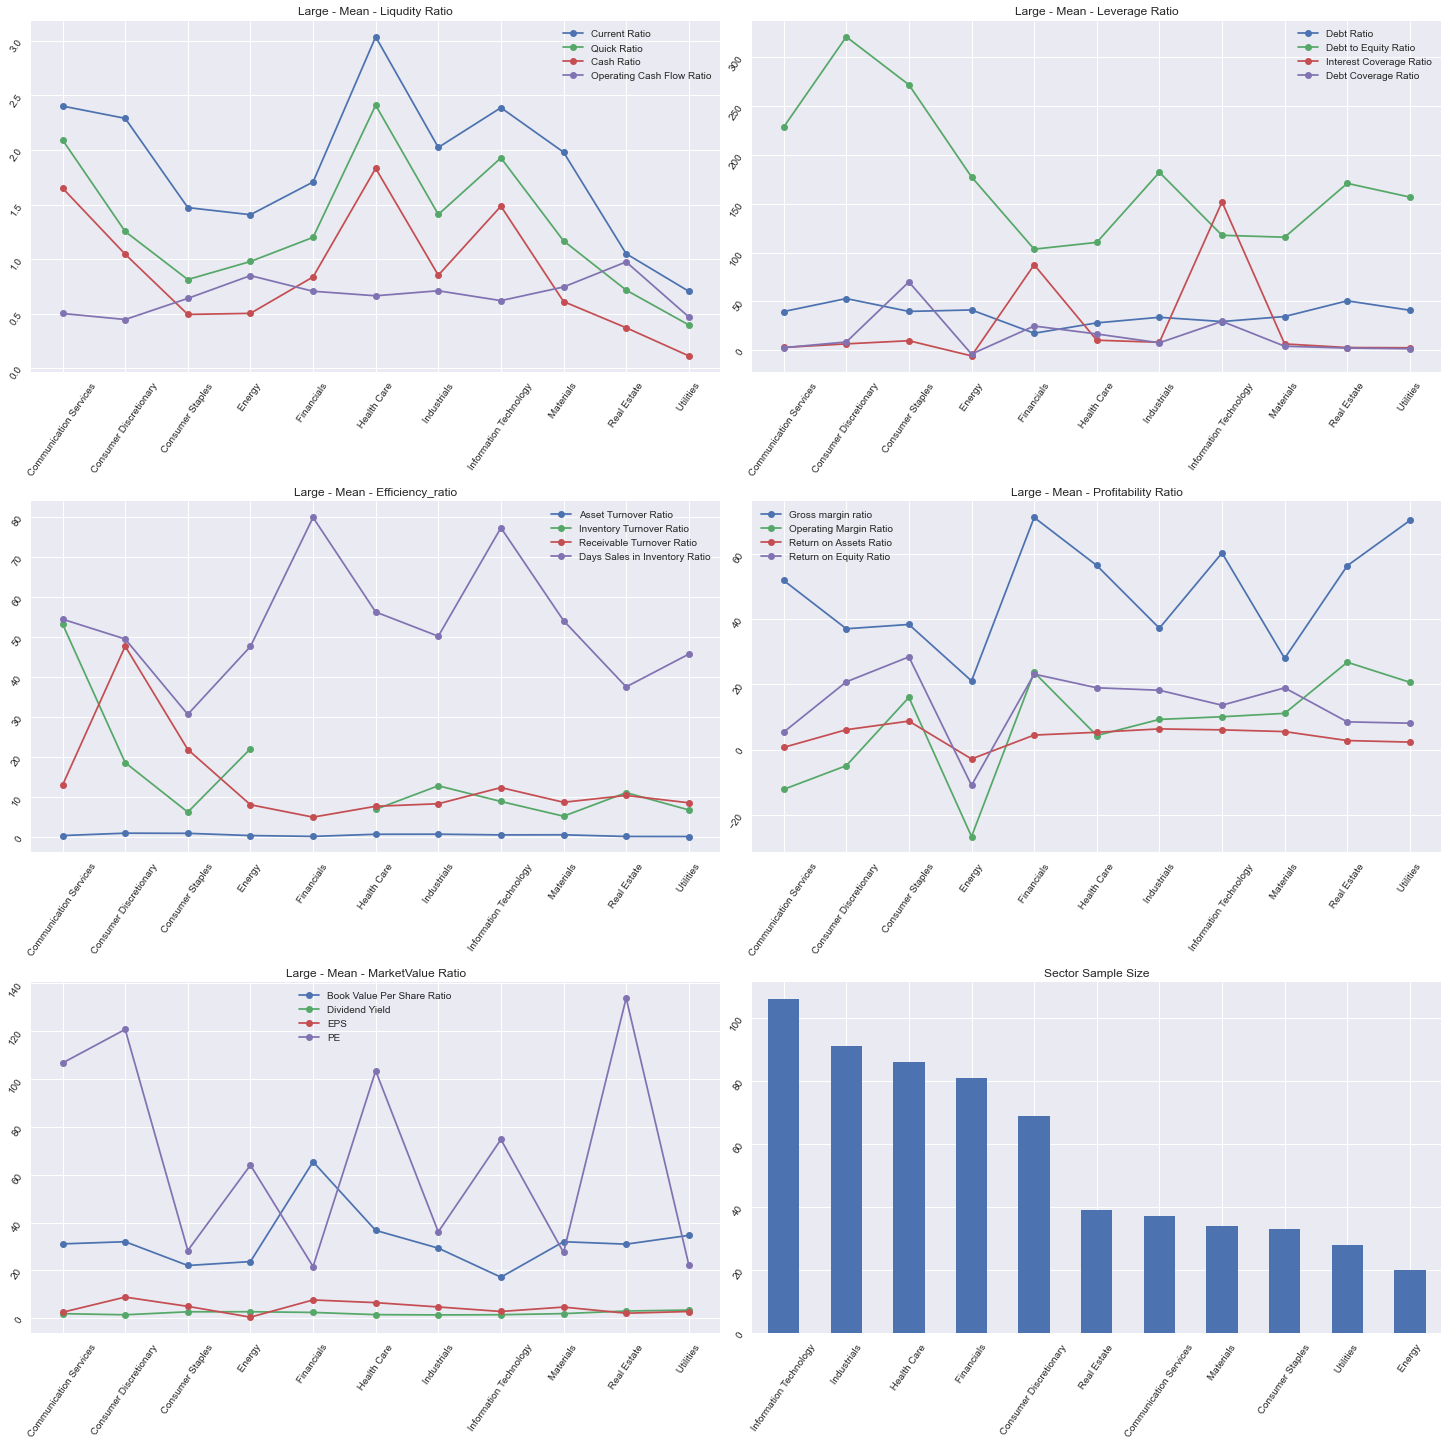

In [13]:
fig_large = plt.figure(constrained_layout=True) 
fig_large.set_figheight(20)
fig_large.set_figwidth(20)
gs = fig_large.add_gridspec(15, 14) 

large_ax1 = fig_large.add_subplot(gs[0:5,0:7]) 
large_ax1.set_title('Large - Mean - Liqudity Ratio') 
large_ax1.plot(df_large.groupby(['Sector'])[liquidity_ratio].mean(), marker='o') 
large_ax1.tick_params(labelrotation=55) 
large_ax1.legend(liquidity_ratio) 

large_ax2 = fig_large.add_subplot(gs[0:5, 7:14]) 
large_ax2.plot(df_large.groupby(['Sector'])[leverage_ratio].mean(), marker='o') 
large_ax2.tick_params(labelrotation=55) 
large_ax2.legend(leverage_ratio) 
large_ax2.set_title('Large - Mean - Leverage Ratio') 

large_ax3 = fig_large.add_subplot(gs[5:10,0:7]) 
large_ax3.plot(df_large.groupby(['Sector'])[efficiency_ratio].mean(), marker='o') 
large_ax3.tick_params(labelrotation=55) 
large_ax3.legend(efficiency_ratio) 
large_ax3.set_title('Large - Mean - Efficiency_ratio')  

large_ax4 = fig_large.add_subplot(gs[5:10, 7:14]) 
large_ax4.plot(df_large.groupby(['Sector'])[profitability_ratio].mean(), marker='o') 
large_ax4.tick_params(labelrotation=55) 
large_ax4.legend(profitability_ratio) 
large_ax4.set_title('Large - Mean - Profitability Ratio')  

large_ax5 = fig_large.add_subplot(gs[10:15,:7]) 
large_ax5.plot(df_large.groupby(['Sector'])[market_value_ratio].mean(), marker='o') 
large_ax5.tick_params(labelrotation=55) 
large_ax5.legend(market_value_ratio) 
large_ax5.set_title('Large - Mean - MarketValue Ratio') 

large_ax6 = fig_large.add_subplot(gs[10:15,7:14]) 
df_large['Sector'].value_counts().plot(kind='bar',ax=large_ax6)
large_ax6.tick_params(labelrotation=55) 
large_ax6.set_title('Sector Sample Size') 

In [14]:
df_large['Sector'].value_counts().tolist()

[106, 91, 86, 81, 69, 39, 37, 34, 33, 28, 20]

In [15]:
df_large['Sector'].value_counts()

 Information Technology     106
 Industrials                 91
 Health Care                 86
 Financials                  81
 Consumer Discretionary      69
 Real Estate                 39
 Communication Services      37
 Materials                   34
 Consumer Staples            33
 Utilities                   28
 Energy                      20
Name: Sector, dtype: int64